# Seyed Mohammad Amin Atyabi - 830402014 - HW 8

در این مسئله قصد داریم تا با استفاده از روش نزدیکترین همسایه، به تشخیص برچسب مجموعه داده ای که در اختیارمان قرار گرفته است اقدام کنیم.

در روش نزدیکترین همسایه، مجموع فاصله اقلیدسی میان مقدار فیچر ها اندازه گرفته می شود و میان تعداد مشخص نمونه ای که کمترین فاصله را دارند بیشترین تکرار برچسب را به عنوان برچسب انتخاب میکنیم.

برای این تمرین لازم است تا مجموعه داده را به 5 بخش که در هر کدام 20 عدد نمونه است تقسیم کنیم.

در روش نزدیکترین همسابه مفهومی به معنی مدل وجود ندارد فلذا تمام عملیات تشخیص برچسب به صورت همزمان انجام میشود.

در مسائل نزدیکترین همسابه، گاه لازم است مقادیر فیچر ها را نرمال کنیم تا مقایس همه مقادیر یکسان بوده و در اندازه گیزی فاصله تاثیر یکسانی داشته باشند.

برای اینکار از رابطه زیر استفاده میکنیم. با استفاده از این رابطه میانگین صفر و انحراف معیار استاندارد برابر با یک میشود.

$$ x' = \frac{x - \bar{x}}{\sigma} $$

In [1]:
import pandas
from math import sqrt
from statistics import mode
from scipy import io as sio
from matplotlib import pyplot as plt


def split_data(data: pandas.DataFrame):
    splits = []
    for i in range(5):
        splits.append(data.iloc[i:i + 20, :])
    return splits


def normalize_columns(data, columns):
    for column in columns:
        data[column] = (data[column] - data[column].mean()) / data[column].std()
    return data


def plot_k(data, normalize):
    if normalize:
        data = normalize_columns(data, ['AGE', 'TSH', 'T3', 'TT4'])
    splits = split_data(data)

    best_k = None
    best_k_error = 0
    k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    error_list = []

    for k in k_list:
        error = 0
        for i in range(len(splits)):
            model = None
            for j in range(len(splits)):
                if j == i: continue
                model = pandas.concat([model, splits[j]])
            error += predict_label(model, splits[i], k)
        error /= len(splits)
        error_list.append(error)
        if best_k is None or error < best_k_error:
            best_k = k
            best_k_error = error

    print(f'Best K value: {best_k}')

    plt.plot(k_list, error_list, '-mo')
    plt.xticks(k_list)
    plt.xlabel('K')
    plt.ylabel('Average Error')
    plt.grid()
    plt.show()


def predict_label(model, data, k):
    error = 0
    for _, d in data.iterrows():
        distances = []
        for _, m in model.iterrows():
            distance = 0
            for f in model.columns:
                if f == 'SICKNESS': continue
                distance += ((m[f] - d[f]) ** 2)
            distance = sqrt(distance)
            distances.append((distance, m['SICKNESS']))
        distances = sorted(distances, key=lambda x: x[0])[0: k]
        classes = [x[1] for x in distances]
        predict = mode(classes)
        if predict != d['SICKNESS']: error += 1
    return error


columns = [
    'AGE',
    'ON THYROXINE',
    'TSH MEASURED',
    'TSH',
    'T3',
    'TT4 MEASURED',
    'TT4',
    'SICKNESS'
]

data = pandas.DataFrame(sio.loadmat('Data/Thyroid.mat').get('Data'), columns=columns, dtype=float)

در این بخش بدون نرمال کردن داده ها اقدام به استفاده از آن ها میکنیم.

همانطور که مشاهده میشود، میانگین خطا به ازای مقادیر 1، 2 و 8 بدست می آید.

Best K value: 1


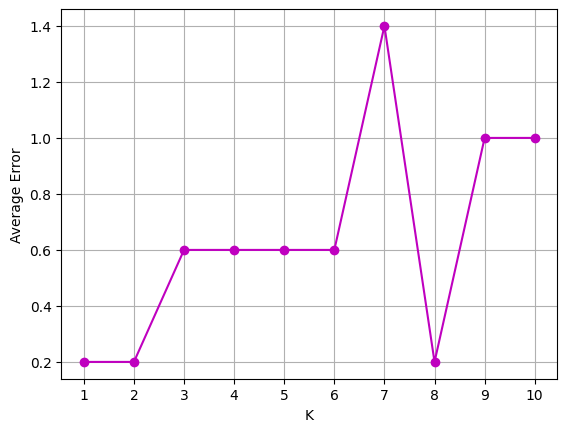

In [2]:
plot_k(data, False)

در این بخش با نرمال کردن داده ها اقدام به استفاده از آن ها میکنیم.

همانطور که مشاهده میشود، میانگین خطا به ازای مقادیر 1 و 2 بدست می آید.

Best K value: 1


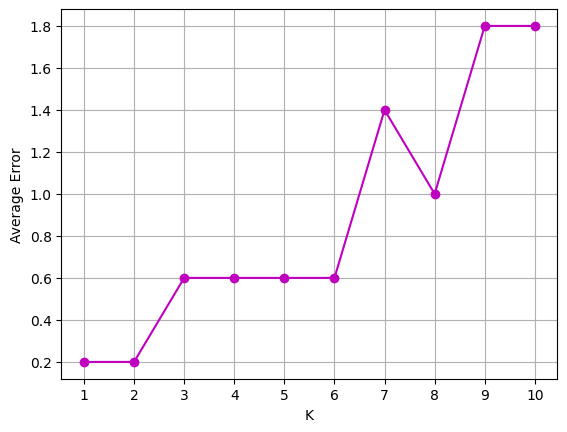

In [3]:
plot_k(data, True)